###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("college_1.csv")
df.shape

(84, 7)

In [3]:
df.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising'],
      dtype='object')

In [4]:
df1=pd.read_csv("college_2.csv")
df1.shape

(35, 9)

In [5]:
df1.columns

Index(['Name', 'python', 'python_en', 'mysql', 'computational_thinking',
       'Previous Geekions', 'CodeKata Score', 'Department', 'Rising'],
      dtype='object')

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [6]:
guvi_data=pd.concat([df,df1],axis=0)

guvi_data.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


In [12]:
a=guvi_data["python_en"].mode()

guvi_data["python_en"].fillna(a[0],inplace=True)

In [13]:
guvi_data.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0.0,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,0.0,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,0.0,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,0.0,NaN


In [14]:
b=guvi_data["computational_thinking"].mode()
guvi_data["computational_thinking"].fillna(b[0],inplace=True)

In [15]:
guvi_data.isnull().sum()

Name                      0
python                    0
mysql                     0
Previous Geekions         0
CodeKata Score            0
Department                0
Rising                    0
python_en                 0
computational_thinking    0
dtype: int64

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [10]:
df2=guvi_data[guvi_data["CodeKata Score"]>15000]

df2.to_csv("Exceeded expectations.csv",index=False)

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [22]:
df3=guvi_data[((guvi_data["CodeKata Score"]>10000) & (guvi_data["CodeKata Score"]<15000))]

df3.to_csv("Reached_expectations.csv",index=False)

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [23]:
df4=guvi_data[((guvi_data["CodeKata Score"]>7000) & (guvi_data["CodeKata Score"]<10000))]

df4.to_csv("Needs_Improvement.csv",index=False)

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [24]:
df5=guvi_data[guvi_data["CodeKata Score"]<7000]

df5.to_csv("Unsatisfactory.csv",index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [25]:
guvi_data["geekkata"]=guvi_data["CodeKata Score"]-guvi_data["Previous Geekions"]

guvi_data["geekkata"].mean()

209.41176470588235

###### No of students participated 

In [11]:
guvi_data["Name"].count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [12]:
Average_completion_person=guvi_data[((guvi_data["python"]==100)|(guvi_data["mysql"]==100)|(guvi_data["python_en"]==100)|(guvi_data["computational_thinking"]==100))]["Name"]
Average_completion_person

2                    HEMAVATHI.R
3                    Mugunthan S
4                    Sathammai.S
5                   NIVEESHWAR S
11                  Ponniyamma.R
12                     SABAPATHI
13                      RAGHAVAN
15                      Pavithra
17                   v.vithyasri
18            Abirami Anbazhagan
19                  S.srinivasan
20                      s.janani
22                       Yuvasri
24                       MEERA.M
25                     Tpavithra
26                 sri dharshini
28                 pooja priya.B
29                       chithra
30                    manikandan
31                Kaliaperumal G
34                    tamilarasi
36                    selvakumar
37                     nivedha.s
38                       Stephen
40                    HSharukhan
41                   vijayakumar
44                       ponni.p
45                    PRAVEENA K
46    siva sai perumal polisetti
49                      bavithra
53        

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [48]:
guvi_data["geekkata"].unique()

array([   0,  130,  340, 2000, 1760, 1700, 3140, 1990,  620,  380,  690,
       1540,  560, 1360,  320,  840, 1340, 1000,   30, 1830,  770,  580],
      dtype=int64)

In [50]:
a=guvi_data.sort_values("geekkata",ascending=False)

Top_3_candiate=a.head(3)["Name"]

Top_3_candiate

8              shifak N
18       Narasimhan Y L
2     Ganesh Ramkumar R
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [52]:
a=guvi_data.sort_values("Previous Geekions",ascending=False)

Top_3_candiate=a.head(3)["Name"]

Top_3_candiate

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

In [13]:
import matplotlib.pyplot as plt
guvi_data.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,0.0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0.0,0.0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,0.0,0.0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,0.0,0.0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,0.0,0.0


In [34]:
data=guvi_data.groupby("Department")["CodeKata Score"].agg("sum")
data

Department
Computer Science and Engineering             320025
Electronics and Communication Engineering    108335
Electronics and Electrical Engineering        53800
Name: CodeKata Score, dtype: int64

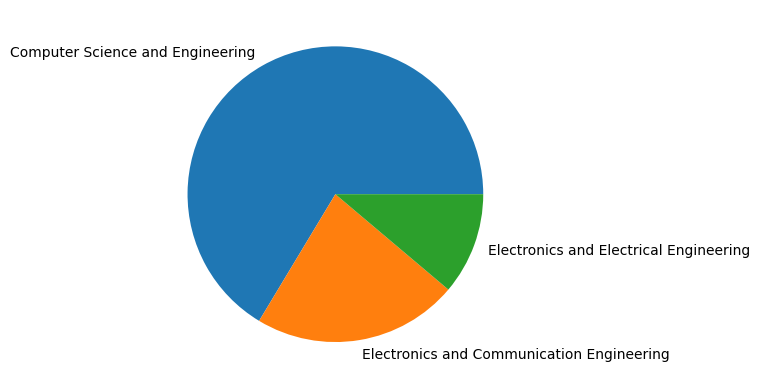

In [35]:
plt.pie(data,labels=["Computer Science and Engineering","Electronics and Communication Engineering","Electronics and Electrical Engineering"])
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

<AxesSubplot: xlabel='Department'>

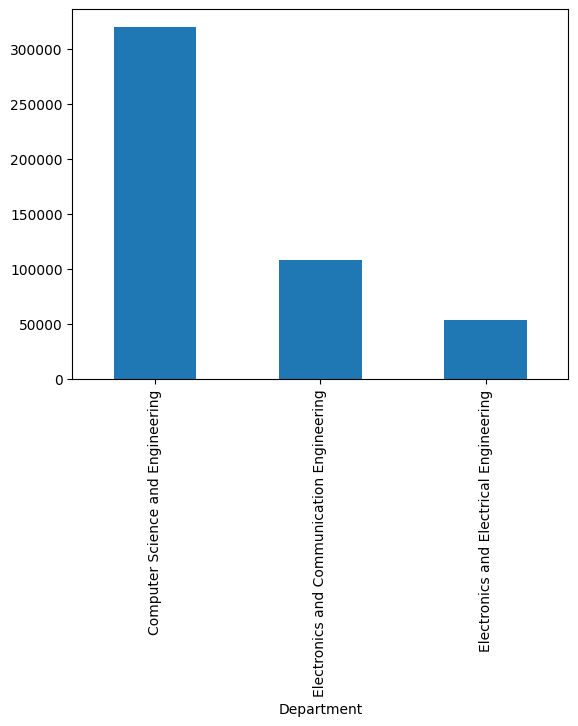

In [37]:
data.plot(kind="bar")